Run the cell below if you want to have output of the cells on their side
reload the page to get back to the default way.
You can edit background colors below (change the hex #RGB values)
Taken from:
https://github.com/jupyter/notebook/issues/2897#issuecomment-442959381

In [1]:
%%html
<style>
#notebook-container {
    width: 100%;
    background-color: #111
}

.code_cell {
   flex-direction: row !important;
}

.code_cell .output_wrapper {
    width: 50%;
    background-color: #333
}

.code_cell .input {
    width: 50%;
    background-color: #222
}
</style>

# Initialize
Run the cell below for imports and function definitions to happen.

Serial connection tries to be established. To reset the connection at any point, run the cell again.

In [3]:
sys.executable

'd:\\Erik\\Programming\\Projects\\MagneticTweezers\\magnetic_tweezers_brugueslab\\python\\.venv\\Scripts\\python.exe'

In [1]:
import os, sys
# sys.path.append()

os.getcwd()

'd:\\Erik\\Programming\\Projects\\MagneticTweezers\\magnetic_tweezers_brugueslab\\python\\voltage_control'

In [3]:
sys.path


['d:\\Erik\\Programming\\Projects\\MagneticTweezers\\magnetic_tweezers_brugueslab\\python\\voltage_control',
 'C:\\Users\\Erik\\AppData\\Local\\Programs\\Python\\Python310\\python310.zip',
 'C:\\Users\\Erik\\AppData\\Local\\Programs\\Python\\Python310\\DLLs',
 'C:\\Users\\Erik\\AppData\\Local\\Programs\\Python\\Python310\\lib',
 'C:\\Users\\Erik\\AppData\\Local\\Programs\\Python\\Python310',
 'd:\\Erik\\Programming\\Projects\\MagneticTweezers\\magnetic_tweezers_brugueslab\\python\\.venv',
 '',
 'd:\\Erik\\Programming\\Projects\\MagneticTweezers\\magnetic_tweezers_brugueslab\\python\\.venv\\lib\\site-packages',
 'd:\\Erik\\Programming\\Projects\\MagneticTweezers\\magnetic_tweezers_brugueslab\\python\\.venv\\lib\\site-packages\\win32',
 'd:\\Erik\\Programming\\Projects\\MagneticTweezers\\magnetic_tweezers_brugueslab\\python\\.venv\\lib\\site-packages\\win32\\lib',
 'd:\\Erik\\Programming\\Projects\\MagneticTweezers\\magnetic_tweezers_brugueslab\\python\\.venv\\lib\\site-packages\\Pythonw

In [5]:

print(sys.path[0])
print(os.path.dirname(sys.path[0]))

d:\Erik\Programming\Projects\MagneticTweezers\magnetic_tweezers_brugueslab\python\voltage_control
d:\Erik\Programming\Projects\MagneticTweezers\magnetic_tweezers_brugueslab\python


In [6]:
import os
import sys
import inspect

parentdir = os.path.dirname(sys.path[0])
sys.path.append(parentdir) 

sys.path

['d:\\Erik\\Programming\\Projects\\MagneticTweezers\\magnetic_tweezers_brugueslab\\python\\voltage_control',
 'C:\\Users\\Erik\\AppData\\Local\\Programs\\Python\\Python310\\python310.zip',
 'C:\\Users\\Erik\\AppData\\Local\\Programs\\Python\\Python310\\DLLs',
 'C:\\Users\\Erik\\AppData\\Local\\Programs\\Python\\Python310\\lib',
 'C:\\Users\\Erik\\AppData\\Local\\Programs\\Python\\Python310',
 'd:\\Erik\\Programming\\Projects\\MagneticTweezers\\magnetic_tweezers_brugueslab\\python\\.venv',
 '',
 'd:\\Erik\\Programming\\Projects\\MagneticTweezers\\magnetic_tweezers_brugueslab\\python\\.venv\\lib\\site-packages',
 'd:\\Erik\\Programming\\Projects\\MagneticTweezers\\magnetic_tweezers_brugueslab\\python\\.venv\\lib\\site-packages\\win32',
 'd:\\Erik\\Programming\\Projects\\MagneticTweezers\\magnetic_tweezers_brugueslab\\python\\.venv\\lib\\site-packages\\win32\\lib',
 'd:\\Erik\\Programming\\Projects\\MagneticTweezers\\magnetic_tweezers_brugueslab\\python\\.venv\\lib\\site-packages\\Pythonw

In [7]:
from serial_connection import serial_connection
serial_connection.serialConnection()

TypeError: serialConnection.__init__() missing 1 required positional argument: 'port'

In [5]:

sys.path

['d:\\Erik\\Programming\\Projects\\MagneticTweezers\\magnetic_tweezers_brugueslab\\python\\voltage_control',
 'C:\\Users\\Erik\\AppData\\Local\\Programs\\Python\\Python310\\python310.zip',
 'C:\\Users\\Erik\\AppData\\Local\\Programs\\Python\\Python310\\DLLs',
 'C:\\Users\\Erik\\AppData\\Local\\Programs\\Python\\Python310\\lib',
 'C:\\Users\\Erik\\AppData\\Local\\Programs\\Python\\Python310',
 'd:\\Erik\\Programming\\Projects\\MagneticTweezers\\magnetic_tweezers_brugueslab\\python\\.venv',
 '',
 'd:\\Erik\\Programming\\Projects\\MagneticTweezers\\magnetic_tweezers_brugueslab\\python\\.venv\\lib\\site-packages',
 'd:\\Erik\\Programming\\Projects\\MagneticTweezers\\magnetic_tweezers_brugueslab\\python\\.venv\\lib\\site-packages\\win32',
 'd:\\Erik\\Programming\\Projects\\MagneticTweezers\\magnetic_tweezers_brugueslab\\python\\.venv\\lib\\site-packages\\win32\\lib',
 'd:\\Erik\\Programming\\Projects\\MagneticTweezers\\magnetic_tweezers_brugueslab\\python\\.venv\\lib\\site-packages\\Pythonw

In [9]:
# In case that serial conneciton is existing, it gets closed.
try:
    sc.serial.close()
except:
    pass

# To autoreload imported libraries:    
%load_ext autoreload
%autoreload 2

import logging
import time

from serial_connection import serial_connection

def flush():
    """
    Flush input buffer of the serial by reading and printing it's contetnts.
    
    There is a hardcoded limit on how many lines are read. If the buffer is empty
    sooner the reading stops.
    """
    flag_buffer_empty = False
    print('... Flushing... Lines in buffer:')
    for i in range(100):
        input_line = sc.readline()
        print(input_line)
        if len(input_line) <= 0:
            print('... nothing more to flush.')
            flag_buffer_empty = True
            break
    if not flag_buffer_empty:
        print('!! There might still be data in the buffer. Try flushing again.')
    print('... flushing done!')

    
# --- Init settings ------------------------------------------------------------    
# COM port to which Arduino is connected
# DAC1_port = 'COM24' # On the lab computer
DAC1_port = 'COM7'  # On my laptop

# Set the level of logging. (recommended: logging.INFO 
# for more output you can use: logging.DEBUG)
logging.basicConfig(level=logging.INFO)
# ------------------------------------------------------------------------------
    
# Start the serial connection
sc = serial_connection.serialConnection(port=DAC1_port, baud_rate=19200, string_terminator='\r\n')

a = sc.send_string('!PA 0', wait_for_answer=False)

# ### Settings on the Arduino
# scmd.addCommand("!TT", cmd_set_auto_timeout_time);  // _ #autoTimeoutTime
a = sc.send_string('!TT 200', wait_for_answer=False)
# scmd.addCommand("!TO", cmd_set_auto_timeout_on);    // _ #autoTimeoutOn (0 or 1)
a = sc.send_string('!TO 1', wait_for_answer=False)
# scmd.addCommand("!VM", cmd_set_voltage_max);        // _ #Vmax (in range 0 to 3000)
a = sc.send_string('!VM 2000', wait_for_answer=False)
# scmd.addCommand("!PA", cmd_setPrintAll);            // _ #printAll (0 or 1)
a = sc.send_string('!PA 0', wait_for_answer=False)

flush()    

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


INFO:root:Serial opened on port COM7 with baud rate 19200


... Flushing... Lines in buffer:
bytearray(b'Setup done.\r\n')
bytearray(b'File: V02_pcb_hotfix.ino, v0.2.0\r\n')
bytearray(b'MAXSERIALCOMMANDS should be 15. It is: 15\r\n')
bytearray(b"For help type \'help\'.\r\n")
bytearray(b'Voltage set. Tip: 0, voltage: 0\r\n')
bytearray(b'Voltage set. Tip: 1, voltage: 0\r\n')
bytearray(b'Voltage set. Tip: 0, voltage: 0\r\n')
bytearray(b'Voltage set. Tip: 1, voltage: 0\r\n')
bytearray(b'Voltage set. Tip: 0, voltage: 0\r\n')
bytearray(b'Voltage set. Tip: 1, voltage: 0\r\n')
bytearray(b'Voltage set. Tip: 0, voltage: 0\r\n')
bytearray(b'Voltage set. Tip: 1, voltage: 0\r\n')
bytearray(b'Voltage set. Tip: 0, voltage: 0\r\n')
bytearray(b'Voltage set. Tip: 1, voltage: 0\r\n')
bytearray(b'Voltage set. Tip: 0, voltage: 0\r\n')
bytearray(b'Voltage set. Tip: 1, voltage: 0\r\n')
bytearray(b'Voltage set. Tip: 0, voltage: 0\r\n')
bytearray(b'Voltage set. Tip: 1, voltage: 0\r\n')
bytearray(b'Voltage set. Tip: 0, voltage: 0\r\n')
bytearray(b'Voltage set. Tip: 1, v

In [51]:
# ### (optional) Changing the logging level at any time
logging.getLogger().setLevel(logging.INFO)
# logging.getLogger().setLevel(logging.DEBUG)

# Run experiment

In [16]:
import numpy as np

measurements = []
# --- User settings -------------------------------------------------------------------

mode = ['step', 'sine', 'box'][2]
voltage_amplitude = 2000 # Max voltage
t_box = 3


t_signal_start = 1
t_signal_stop = t_signal_start + t_box
t_recording_stop = t_signal_stop + 3

dT = 0.05 # Approximate time resolution (loop time)
# -------------------------------------------------------------------------------------

t_start = time.time()
timer_loop_time = time.time()

while time.time() < t_start + t_recording_stop:
    t = time.time() - t_start
    if mode == 'step':
        if t > t_signal_start:
            voltage = voltage_amplitude
        else:
            voltage = 0
    elif mode == 'sine':
        if t_signal_start <= t <= t_signal_stop:
            voltage = int( 0.5*voltage_amplitude*(1 + np.sin(2*3.1415*2*t)) )
        else:
            voltage = 0
    elif mode == 'box':
        if t_signal_start <= t <= t_signal_stop:
            voltage = voltage_amplitude
        else:
            voltage = 0
    else:
        print('mode undefined')

    # Send control voltage to Arduino - Vin
    a = sc.send_string('!SI 0 ' + str(voltage), wait_for_answer=True)

    VI = int(a.split(' ')[2])

    # Read the voltage measurement - Vsense
    a = sc.send_string('?SS 0', wait_for_answer=True)
    VS = int(a.split(' ')[1])
    t = time.time() - t_start

    measurements.append([t, VI, VS])
    while time.time() < timer_loop_time + dT:
        time.sleep(0.0001)
    timer_loop_time = time.time()

print('Done')

Done


# Plot the measurements

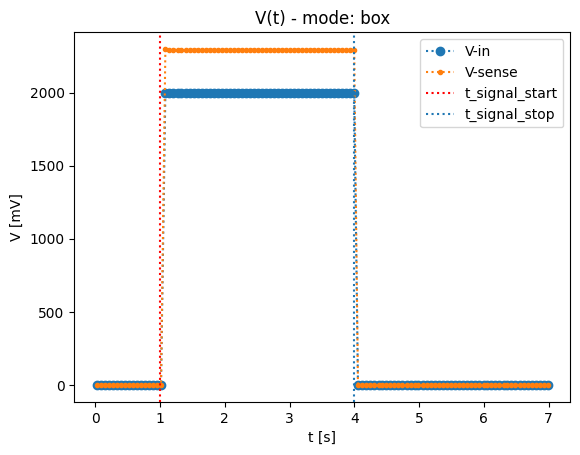

In [17]:
import matplotlib.pyplot as plt
# %matplotlib notebook 
%matplotlib inline
    
data = np.array(measurements)
fig = plt.figure()
fig.patch.set_facecolor('white')


plt.plot(data[:, 0], data[:, 1], ':o', label='V-in')
plt.plot(data[:, 0], data[:, 2], ':.', label='V-sense')
# Visual aids:
plt.axvline(t_signal_start, ls=':', c='r', label='t_signal_start')
plt.axvline(t_signal_stop, ls=':', label='t_signal_stop')
plt.title('V(t) - mode: ' + mode)
plt.legend()
plt.xlabel('t [s]')
plt.ylabel('V [mV]')
plt.show()


### Saving the measurements to a file

In [ ]:
# File counter is used for naming of saved files - it will overwrite saved files 
# when the same number.
file_counter = 0

In [ ]:
# # Save the data to text file
# folder = 'E:/data/Ursa/20221011_exp_w_Melissa/'

# #file_counter += 1
# #file_name = folder + 'voltage_timeseries_' + str(file_counter) + '.txt'
# file_name = folder + "20221011_exp_w_Melissa/221011_sample1B_14_49_500mV/" + "voltage.txt'"

# comment = input('Enter the comment for the saved file:')
# header_text = 't[s] Vin[mV] Vsense[mV]    comment: ' + comment
file_name = "E:/data/Ursa/20221011_exp_w_Melissa/221011_sample1A_15_20_2000_mV_60x/voltage.txt"
np.savetxt(file_name, data)
print('File saved. Name:', file_name)


# Functions for debugging
Should be moved to other files or integrated into source scripts at some point.

In [8]:
"""To get the list of serial ports"""
import sys
import glob
import serial


def serial_ports():
    """ Lists serial port names

        :raises EnvironmentError:
            On unsupported or unknown platforms
        :returns:
            A list of the serial ports available on the system
    """
    if sys.platform.startswith('win'):
        ports = ['COM%s' % (i + 1) for i in range(256)]
    elif sys.platform.startswith('linux') or sys.platform.startswith('cygwin'):
        # this excludes your current terminal "/dev/tty"
        ports = glob.glob('/dev/tty[A-Za-z]*')
    elif sys.platform.startswith('darwin'):
        ports = glob.glob('/dev/tty.*')
    else:
        raise EnvironmentError('Unsupported platform')

    result = []
    for port in ports:
        try:
            s = serial.Serial(port)
            s.close()
            result.append(port)
        except (OSError, serial.SerialException):
            pass
    return result


print('Available serial ports:')
print(serial_ports())


Available serial ports:
['COM3', 'COM7']
